<a href="https://colab.research.google.com/github/sarasame00/laboElectro/blob/main/2.For%C3%A7aEntreCorrents/for%C3%A7aCorrents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import funclab as fl
import numpy as np
import matplotlib.pyplot as plt

##Força vs intensitat


In [3]:
# dades importades del GoogleSheets
I2 = np.array(fl.importData('ForçaEntreCorrents', 'FvsI', 10, delHead = True))
u_I2 = np.array(fl.importData('ForçaEntreCorrents', 'FvsI', 11, delHead = True))
F = np.array(fl.importData('ForçaEntreCorrents', 'FvsI', 9, delHead = True))

In [4]:
L = 0.3 #longitud
r = 0.0081 #distancia entre fils

def func(mu,x):
  return (mu*x*L)/(2*np.pi*r)

curve1 = fl.curveFit(func,I2,F,graf=True)

mu = curve1[0][0]
imu = curve1[1][0]
R2 = curve1[2]

print(f'$\mu_0 = {mu} \pm {imu}$')
print(f'$R^2 = {R2}$')

$\mu_0 = 1.1472078472981075e-06 \pm 4.921712939404002e-08$
$R^2 = 0.9597455395951018$


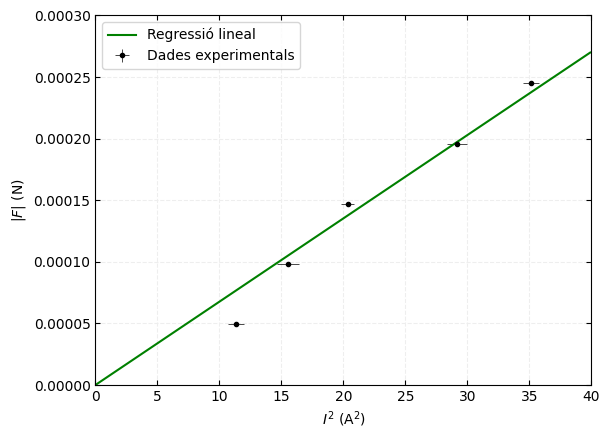

In [5]:
u = np.arange(0, 40, 0.1)

fig = plt.figure()
ax= fig.add_subplot()

fl.plotDades(ax, fl.Variable('I2', I2, u_I2),fl.Variable('F', F, 0),label='Dades experimentals', color='k')

plt.plot(u, func(mu, u),label = 'Regressió lineal', c='g')

plt.xlabel('$I^2$ (A$^2$)')
plt.ylabel('$|F|$ (N)')
plt.xlim(0,40)
plt.ylim(0.,0.00030)

plt.legend()

##Constant Torsió


In [6]:
theta = np.array(fl.importData('ForçaEntreCorrents', 'constantTorsió', 7, delHead = True))
u_theta = np.array(fl.importData('ForçaEntreCorrents', 'constantTorsió', 8, delHead = True))
F2 = np.array(fl.importData('ForçaEntreCorrents', 'constantTorsió', 9, delHead = True))

In [7]:
def func2(k,x):
  return k*x

curve2 = fl.curveFit(func2,theta,F2,graf=True)

k = curve2[0][0]
ik = curve2[1][0]
R2 = curve2[2]

print(f'$k = {k} \pm {ik}$')
print(f'$R^2 = {R2}$')

$k = 3.1642139980306066e-06 \pm 4.215943868362483e-08$
$R^2 = 0.9960915821245244$


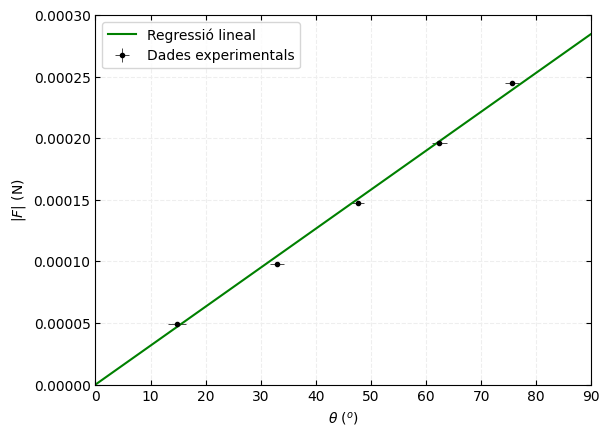

In [8]:
u = np.arange(0, 90, 0.1)

fig = plt.figure()
ax= fig.add_subplot()

fl.plotDades(ax, fl.Variable('theta', theta, u_theta),fl.Variable('F2', F2, 0),label='Dades experimentals', color='k')

plt.plot(u, func2(k, u),label = 'Regressió lineal', c='g')

plt.xlabel('$\\theta$ ($^o$)')
plt.ylabel('$|F|$ (N)')
plt.xlim(0,90)
plt.ylim(0.,0.00030)
plt.legend()

##F vs r-1


In [9]:
F3 = np.array(fl.importData('ForçaEntreCorrents', 'FvsTheta', 10, delHead = True))
u_F3 = np.array(fl.importData('ForçaEntreCorrents', 'FvsTheta', 11, delHead = True))
inv_r = np.array(fl.importData('ForçaEntreCorrents', 'FvsTheta', 12, delHead = True))
u_inv_r = np.array(fl.importData('ForçaEntreCorrents', 'FvsTheta', 13, delHead = True))

In [10]:
I22 = 5.45**2 #intensitat al quadrat

def func3(mu,x):
  return (mu*I22*L*x)/(2*np.pi)

curve2 = fl.curveFit(func3,inv_r,F3,graf=True)

mu2 = curve2[0][0]
imu2 = curve2[1][0]
R2 = curve2[2]

print(f'$\mu_0 = {mu2} \pm {imu2}$')
print(f'$R^2 = {R2}$')

$\mu_0 = 8.964286381510059e-07 \pm 6.580581759514133e-08$
$R^2 = 0.8928395684519798$


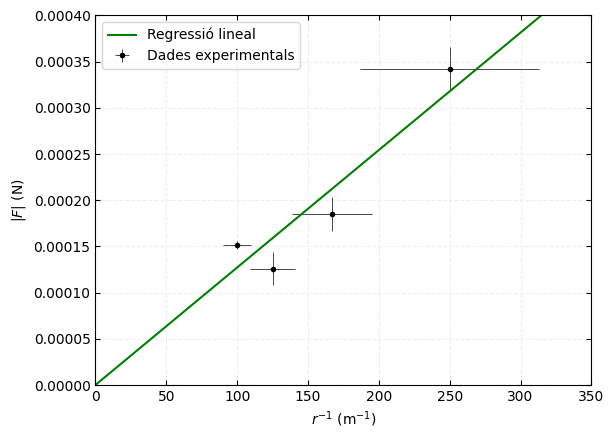

In [11]:
u = np.arange(0, 350, 1)

fig = plt.figure()
ax = fig.add_subplot()

fl.plotDades(ax, fl.Variable('inv_r', inv_r, u_inv_r),fl.Variable('F3', F3, u_F3),label='Dades experimentals', color='k')

plt.plot(u, func3(mu2, u),label = 'Regressió lineal', c='g')

plt.xlabel('$r^{-1}$ (m$^{-1}$)')
plt.ylabel('$|F|$ (N)')
ax.set_ylim(0,0.00040)
ax.set_xlim(0,350)

plt.legend()